In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
import matplotlib.pyplot as plt

# Lagrange2D testing script

Load all data output by test_Lagrange2D.cpp routine:

In [45]:
a = open("a.txt").read()
a.replace(" ","")
a = a.split("\n")
a.remove("")

b = open('b.txt').read()
b.replace(" ","")
b = b.split("\n")
b.remove("")

fT = open('ftrue.txt').read()
fT.replace(" ","")
fT = fT.split("\n")
fT.remove("")

f = []
counter = 0;
for ary in fT:
    ary = ary.strip();
    f.append(ary.split(" "))
    counter = counter + 1

p10 = open('p10.txt').read()
p10.replace(" ","")
p10 = p10.split("\n")
p10.remove("")

p20 = open('p20.txt').read()
p20.replace(" ","")
p20 = p20.split("\n")
p20.remove("")

for i in range(0,len(a)-1):
    a[i] = float(a[i].strip())
    b[i] = float(b[i].strip())

counter = 0
while counter < 75:
    while True:
        try:
            f[counter].remove("")
        except:
            counter = counter + 1
            break;

for i in range(len(f)):
    for j in range(len(f[i])):
        f[i][j] = float(f[i][j])



Plot $f(x,y)$ first

TypeError: ufunc 'multiply' did not contain a loop with signature matching types dtype('<U32') dtype('<U32') dtype('<U32')

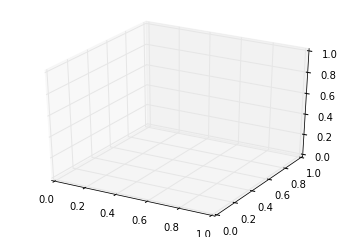

In [47]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = meshgrid(b,a)
surf = ax.plot_surface(a, b, f, rstride=1, cstride=1, linewidth=0, cmap=cm.jet)
ax.set_xlabel('x')
ax.set_ylabel('y')
title('$f(x,y)$')

Now plot both $p_{10}(x,y)$ and $p_{20}(x,y)$

NameError: name 'X' is not defined

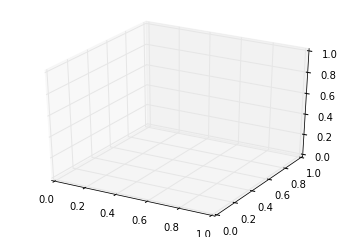

In [11]:
fig = figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, p10, rstride=1, cstride=1, linewidth=0, cmap=cm.jet)
ax.set_xlabel('x')
ax.set_ylabel('y')
title('$p_{10}(x,y)$')

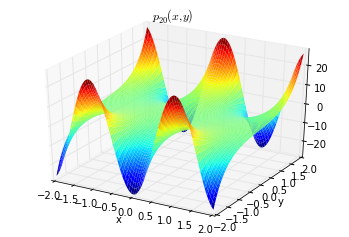

In [5]:
fig = figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, p20, rstride=1, cstride=1, linewidth=0, cmap=cm.jet)
ax.set_xlabel('x')
ax.set_ylabel('y')
title('$p_{20}(x,y)$')

Now plot the error in $p_{10}(x,y)$

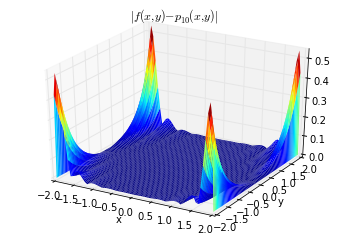

In [6]:
e10 = abs(f-p10)
fig = figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, e10, rstride=1, cstride=1, linewidth=0, cmap=cm.jet)
ax.set_xlabel('x')
ax.set_ylabel('y')
title('$|f(x,y) - p_{10}(x,y)|$')

Now plot the error in $p_{20}(x,y)$

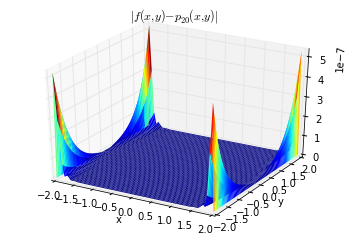

In [7]:
e20 = abs(f-p20)
fig = figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, e20, rstride=1, cstride=1, linewidth=0, cmap=cm.jet)
ax.set_xlabel('x')
ax.set_ylabel('y')
title('$|f(x,y) - p_{20}(x,y)|$')

Now check the max error for each, and compare against a known tolerance for these functions over these intervals with this many nodes

In [8]:
e10tol = 0.058
e20tol = 3.7e-8
e10norm = sqrt(sum(sum(e10**2))/size(e10))
e20norm = sqrt(sum(sum(e20**2))/size(e20))
if (e10norm > e10tol):
    print 'p10 faulure!  ||e10|| = ', e10norm, ' is above tolerance of ',e10tol
else:
    print 'p10 success!  ||e10|| = ', e10norm, ' is below tolerance of ',e10tol
if (e20norm > e20tol):
    print 'p20 failure!  ||e20|| = ', e20norm, ' is above tolerance of ',e20tol
else:
    print 'p20 success!  ||e20|| = ', e20norm, ' is below tolerance of ',e20tol

p10 success!  ||e10|| =  0.0575277609593  is below tolerance of  0.058
p20 success!  ||e20|| =  3.69151159696e-08  is below tolerance of  3.7e-08
